In [1]:
import sys  
sys.path.insert(0, '../../')
import h5py
import matplotlib.pyplot as plt
from cloudseg.datasets.preprocessing import apply_clear_sky, process_irccam_img
import numpy as np

In [2]:
file_name = '../../irccam_20180112_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    print(f['preds'])

<HDF5 dataset "preds": shape (10, 420, 420), type "<f4">


In [3]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(f.keys())

<KeysViewHDF5 ['#refs#', 'AZ', 'BT', 'CLOUDS', 'CameraToffset', 'TB', 'TM', 'ZA', 'alphadata', 'calibdata', 'cloudfrac', 'img', 'mask', 'meteo', 'tair', 'thor']>


In [4]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    print(f['CLOUDS'])

<HDF5 dataset "CLOUDS": shape (1440, 640, 640), type "<f4">


121 158


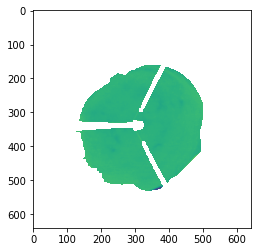

In [5]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    img = f['BT'][0]
    print(np.isnan(img).min(0).argmin(), np.isnan(img).min(1).argmin())
    plt.imshow(img)

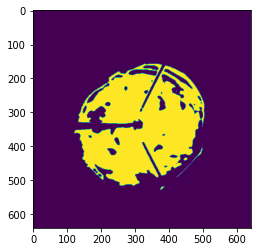

In [44]:
file_name = '../../irccam_20180112_rad_pred.mat'
with h5py.File(file_name, 'r') as f:
    img = f['preds'][0]
    plt.imshow(img)

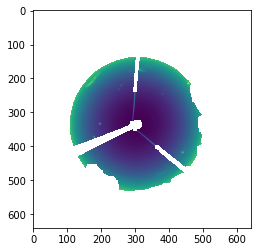

In [7]:
file_name = '../../data/raw/geneva/irccam/irccam_20200621_rad.mat'
with h5py.File(file_name, 'r') as f:
    img = f['BT'][0]
    plt.imshow(img)

In [8]:
from cloudseg.datasets.masking import full_mask

In [9]:
np.unique(full_mask), full_mask

(array([  0, 255], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [10]:
file_name = '../../data/raw/geneva/irccam/irccam_20200621_rad.mat'
with h5py.File(file_name, 'r') as f:
    mask = f['mask']
    print(np.array(mask))

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [11]:
file_name = '../../data/raw/davos/irccam/irccam_20180112_rad.mat'
with h5py.File(file_name, 'r') as f:
    raw_img = f["BT"][0]

In [12]:
raw_img

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [13]:
from cloudseg.datasets.preprocessing import apply_clear_sky, process_irccam_img, get_cropping_indices, crop_image

In [14]:
crop_idx = get_cropping_indices(raw_img)

In [15]:
crop_idx

((148, 568), (111, 531))

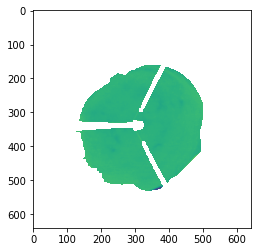

In [16]:
plt.imshow(raw_img)

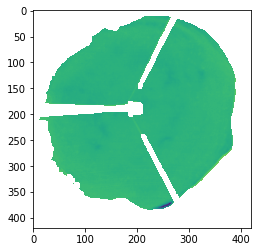

In [17]:
plt.imshow(crop_image(raw_img, crop_idx))

In [23]:
file_name = '../../data/raw/geneva/irccam/irccam_20200621_rad.mat'
with h5py.File(file_name, 'r') as f:
    mask = np.array(f['mask'])

In [26]:
import torch

In [27]:
torch.tensor(mask)

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.uint8)

In [31]:
batch = torch.cat((torch.tensor(img).unsqueeze(0), torch.tensor(img).unsqueeze(0)))

In [32]:
batch.shape

torch.Size([2, 640, 640])

In [40]:
torch.tensor(mask).repeat((8, 1,1)).shape

torch.Size([8, 640, 640])